In [1]:
#world-happiness-report-2021.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

In [5]:
df = pd.read_csv(r'/Users/clairekraft/Desktop/Python/data/world-happiness-report-2021.csv')

In [6]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [9]:
df.info

<bound method DataFrame.info of     Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670  

In [10]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.000000,5.532839,1.073924,2.523000,4.852000,5.534000,6.255000,7.842000
Standard error of ladder score,149.000000,0.058752,0.022001,0.026000,0.043000,0.054000,0.070000,0.173000
upperwhisker,149.000000,5.648007,1.054330,2.596000,4.991000,5.625000,6.344000,7.904000
lowerwhisker,149.000000,5.417631,1.094879,2.449000,4.706000,5.413000,6.128000,7.780000
Logged GDP per capita,149.000000,9.432208,1.158601,6.635000,8.541000,9.569000,10.421000,11.647000
Social support,149.000000,0.814745,0.114889,0.463000,0.750000,0.832000,0.905000,0.983000
Healthy life expectancy,149.000000,64.992799,6.762043,48.478000,59.802000,66.603000,69.600000,76.953000
Freedom to make life choices,149.000000,0.791597,0.113332,0.382000,0.718000,0.804000,0.877000,0.970000
Generosity,149.000000,-0.015134,0.150657,-0.288000,-0.126000,-0.036000,0.079000,0.542000
Perceptions of corruption,149.000000,0.727450,0.179226,0.082000,0.667000,0.781000,0.845000,0.939000


<AxesSubplot:>

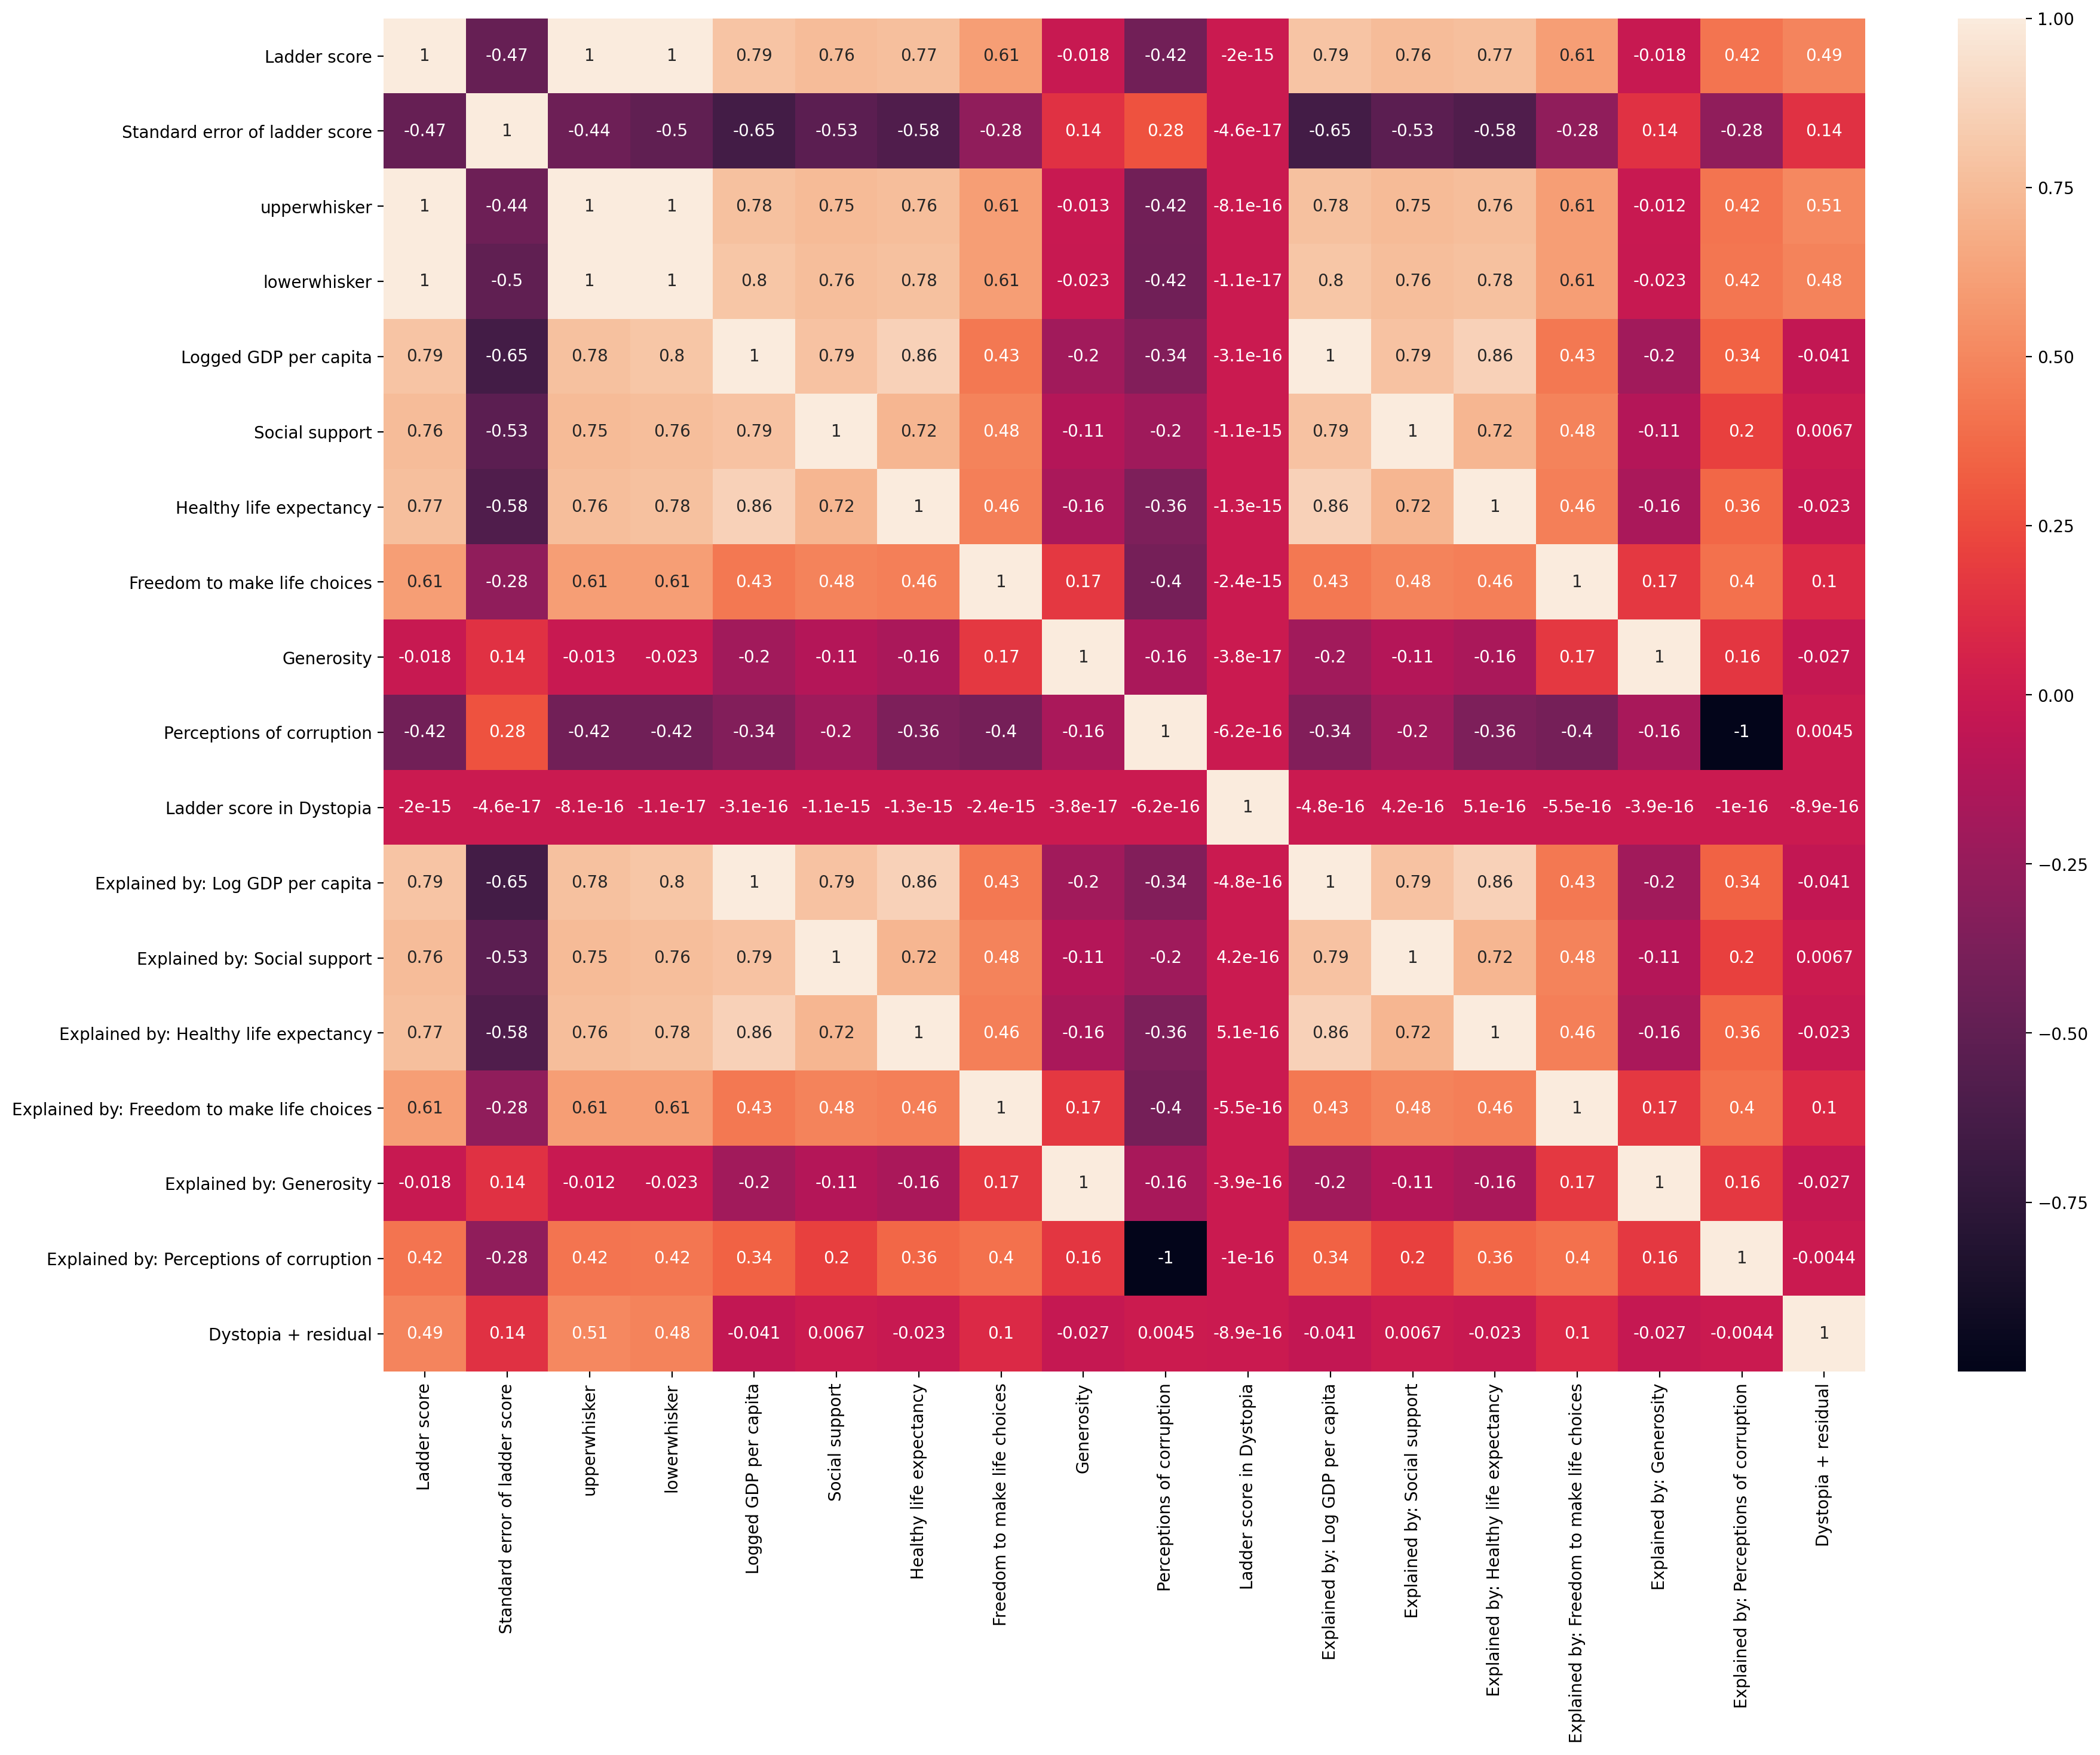

In [11]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True)

In [12]:
high_corruption = df[['Country name','Perceptions of corruption','Healthy life expectancy' ]].sort_values('Perceptions of corruption', ascending = False)

In [16]:
import plotly.express as px

fig = px.bar(high_corruption[:30], x='Country name', y='Perceptions of corruption', color ='Healthy life expectancy',
            title = 'Most corrupt')
fig.show()

In [17]:
#Top 30 countries with the highest (perceived) corruption

In [18]:
fig = px.bar(high_corruption[120:], x='Country name', y='Perceptions of corruption', color ='Healthy life expectancy',
            title = 'Highest to least corrupt')
fig.show()

In [19]:
#Singapore is the least corrupt

In [20]:
life_exp = df[['Country name','Freedom to make life choices','Healthy life expectancy' ]].sort_values('Healthy life expectancy', ascending = False)

In [22]:
fig = px.bar(life_exp[:20], x='Country name', y='Healthy life expectancy', color ='Freedom to make life choices',
            title = 'Life expectancy and freedom to make life choices')
fig.show()

In [23]:
#Singapore wins for having the highest life expectancy AND freedom or autonomy

In [25]:
fig = px.bar(life_exp[140:], x='Country name', y='Healthy life expectancy', color ='Freedom to make life choices',
            title = 'Life expectancy and freedom to make life choices')
fig.show()

In [26]:
#This graph shows the other end of the speturm with the lowest life expectancy and least freedom

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Regional indicator'>

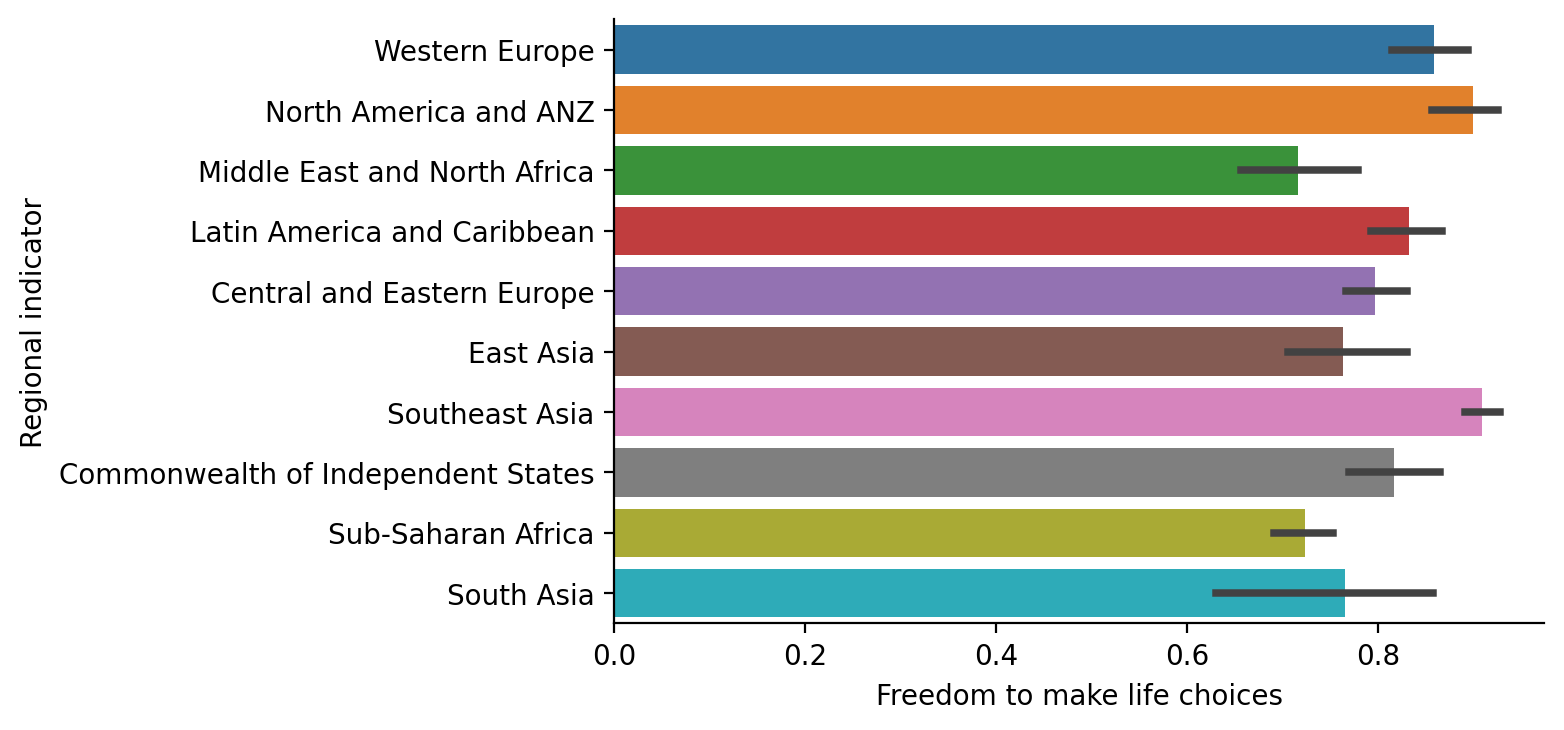

In [27]:
sns.barplot(y = 'Regional indicator', x ='Freedom to make life choices', data = df)

In [28]:
#Freedom browken down by region. 
#The Middle East, N Africa, and Sub-Saharan Africa have the least freedom.

In [29]:
fig = px.scatter(df, x='Regional indicator', y="Freedom to make life choices", color="Healthy life expectancy",
                 size='Logged GDP per capita', hover_data=['Social support'])
fig.show()

In [30]:
#Life expectancy browken down by region. 

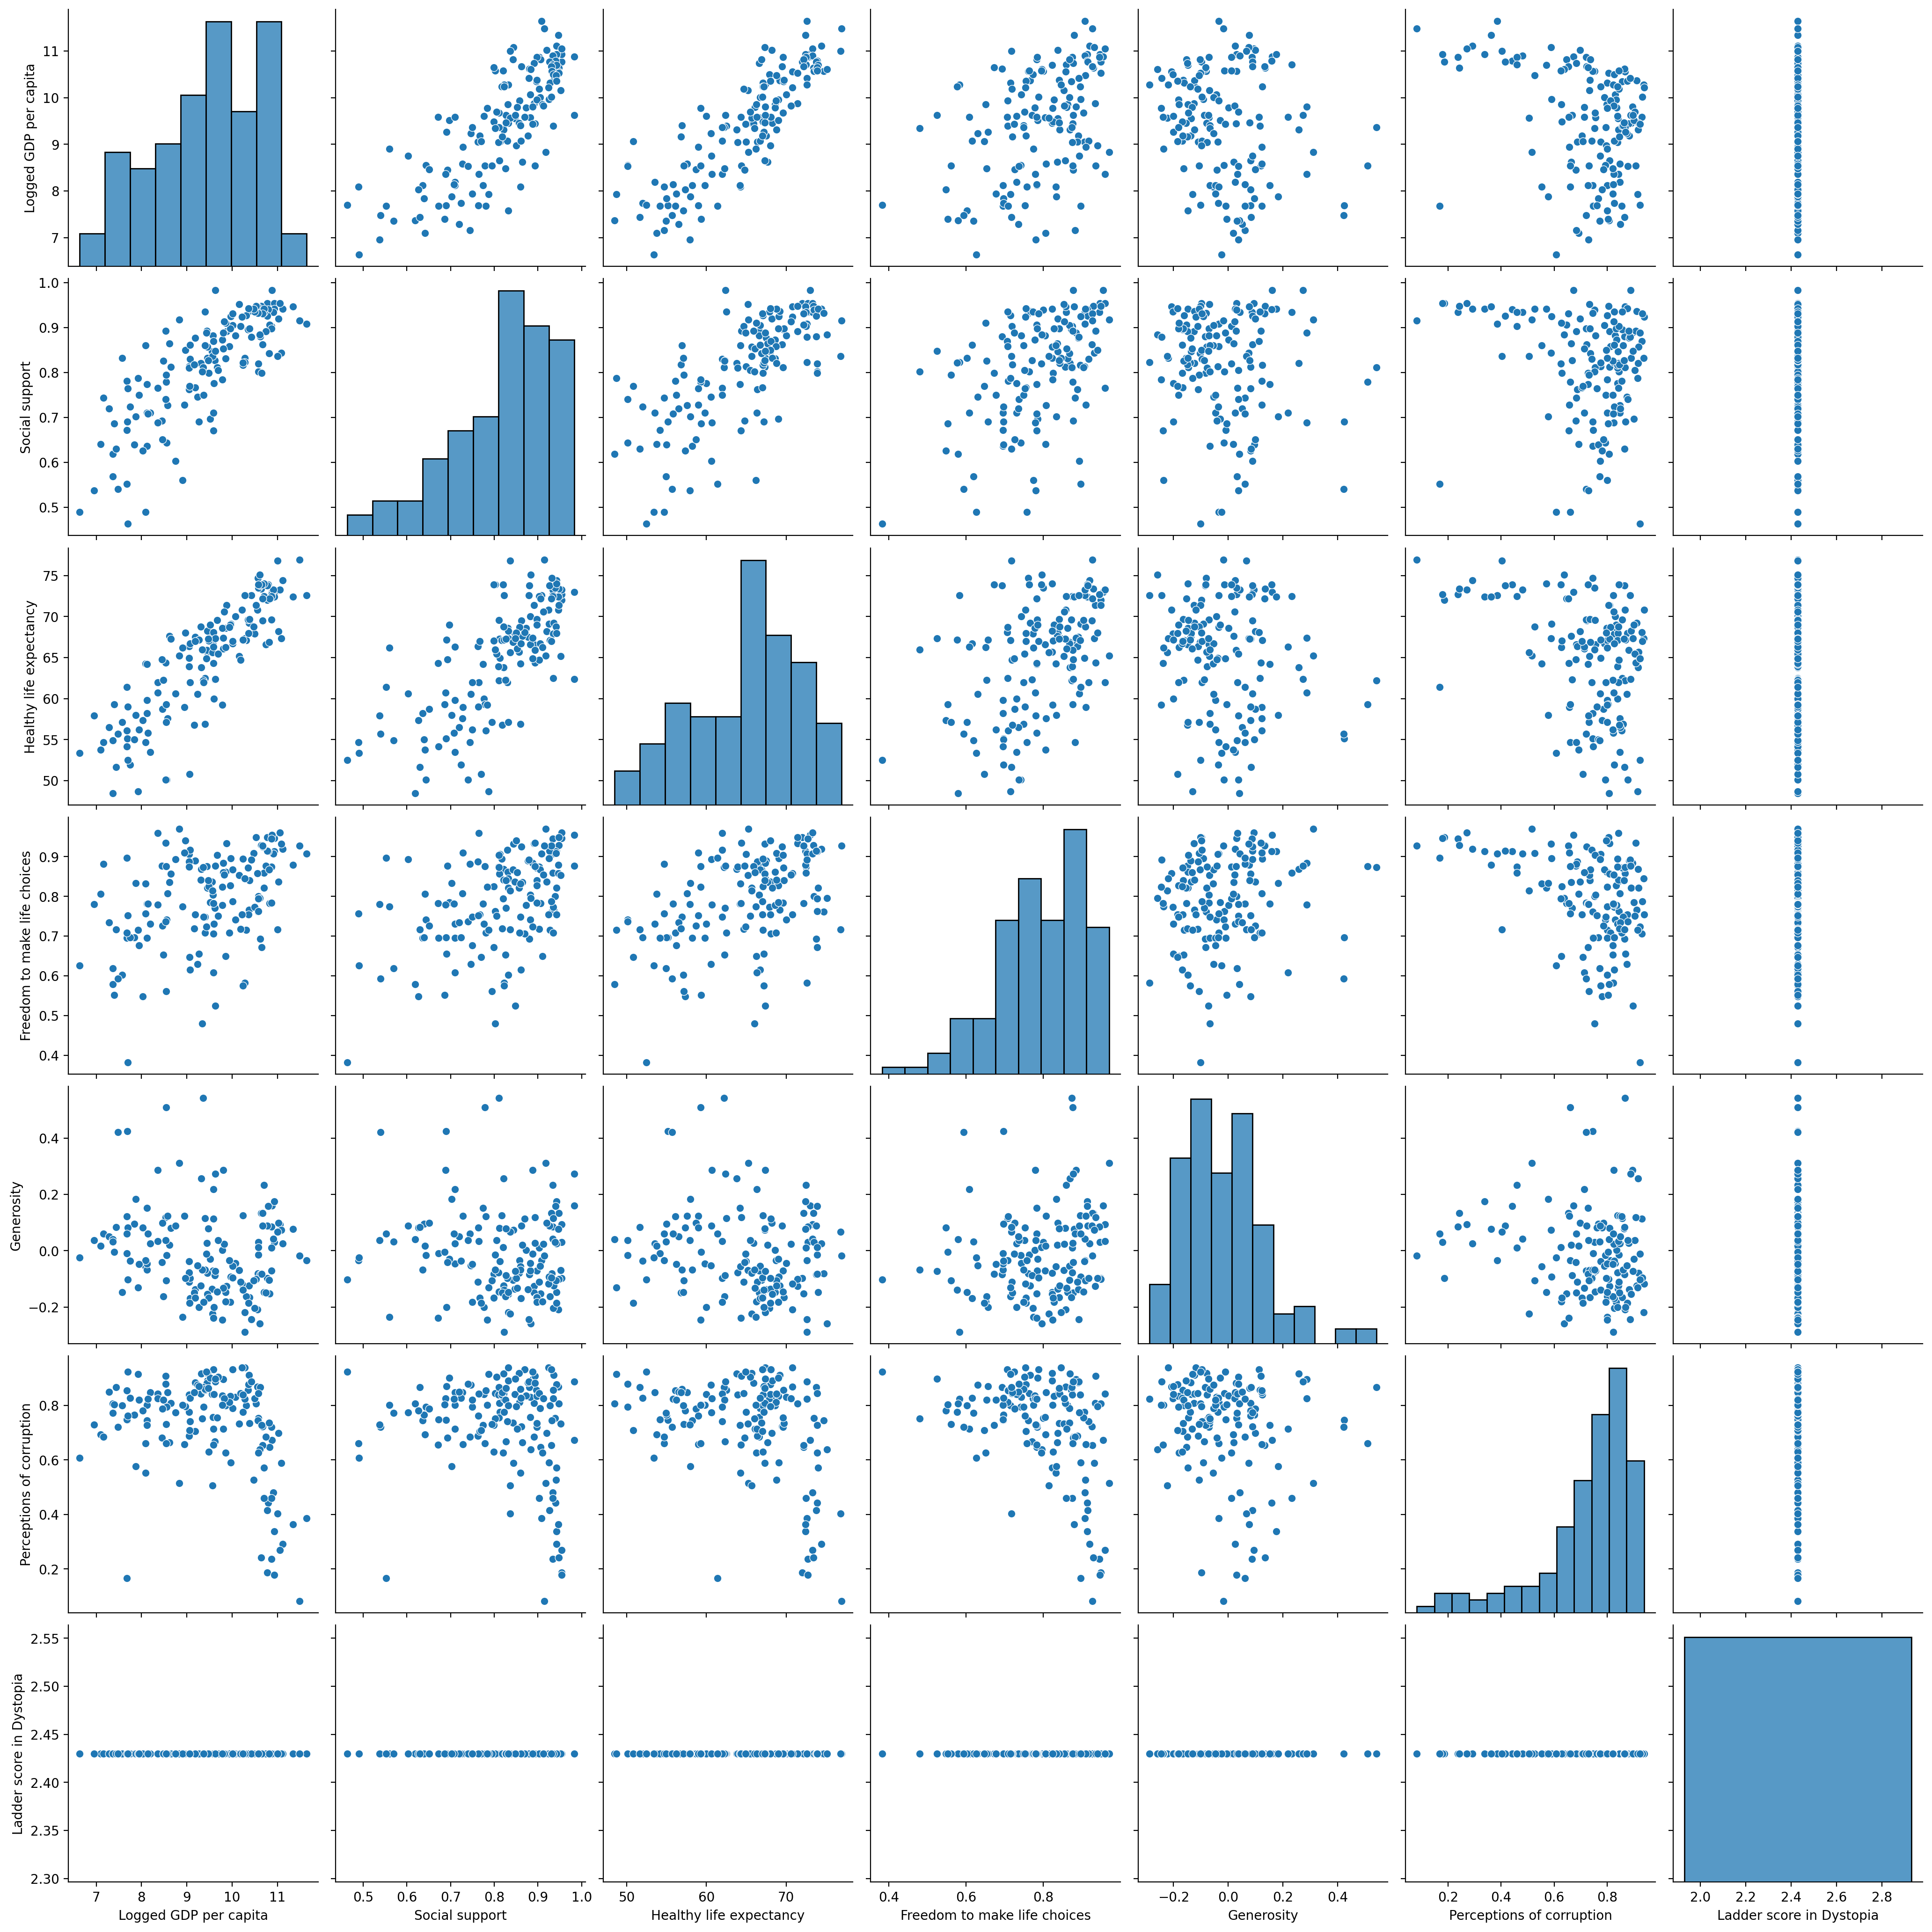

In [32]:
cols = ['Logged GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia']

sns.pairplot(df[cols], height = 3)

In [33]:
#Strong corr between GDP and well-being (which are defined by life expectancy, social support, and freedom/autonomy)
#Generosity looks to be less strongly corr with well-being

In [34]:
fig = px.pie(df, values='Logged GDP per capita', names='Regional indicator', title='% of Logged GDP of regions from data')
fig.show()

In [35]:
fig = px.density_heatmap(df, x="Freedom to make life choices", y='Perceptions of corruption', marginal_x="box", marginal_y="violin")
fig.show()

In [36]:
#looking at how freedom and perception of freedom interact with eah other. 
#Medians: freedom = 0.804, perception of corruption = 0.781

In [37]:
fig = px.scatter(df, x="Healthy life expectancy", y="Logged GDP per capita", color="Regional indicator",
                  marginal_x="box")
fig.show()

In [38]:
#corr b/w life expectancy and GDP, you can also see easily by region

In [39]:
fig = px.violin(df, y="Logged GDP per capita",x ="Generosity", color = 'Regional indicator', box=True, # draw box plot inside the violin
                points='all', hover_data=df.columns # can be 'outliers', or False
               )
fig.show()

In [41]:
#Are the well off (GDP, social support, freedom, life expectancy) more generoous? The conclusion is in general yes.

In [42]:
#Also I conclude Singapor is the happiest country in 2021.